In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_excel("GBDT test data.xlsx",sheet_name="data")
data

,Glucose,Metal ion,Temperature,Buffer,Amino acid,Cell number
0,0.00000,37.454010,27.49080,6.041169,161.1853,-0.93895
1,11.11111,95.071430,39.01429,7.939820,113.9494,26.02635
2,22.22222,73.199390,34.63988,7.664885,129.2145,30.52426
3,33.33333,59.865850,31.97317,6.424678,136.6362,34.42971
4,44.44444,15.601860,23.12037,6.363650,145.6070,38.64883
5,55.55556,15.599450,23.11989,6.366809,178.5176,36.52567
6,66.66667,5.808361,21.16167,6.608484,119.9674,38.69610
7,77.77778,86.617610,37.32352,7.049513,151.4234,42.54173
8,88.88889,60.111500,32.02230,6.863890,159.2415,42.96008
9,100.00000,70.807260,34.16145,6.582458,104.6450,46.77970


In [3]:
data = data.sample(frac=1)

label = "Cell number"
features=data.columns[0:5]
features

Index(['Glucose', 'Metal ion', 'Temperature', 'Buffer', 'Amino acid'], dtype='object')

In [4]:
param_grid_gbdt = {"learning_rate":[i/100 for i in range(1,51,1)],  
                   "max_depth":[2,3,4,5],
                   "n_estimators":[300]}

gbdt = GridSearchCV(GradientBoostingRegressor(),param_grid_gbdt,cv=3)

gbdt.fit(data[features] , data[label])

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06,
                                           0.07, 0.08, 0.09, 0.1, 0.11, 0.12,
                                           0.13, 0.14, 0.15, 0.16, 0.17, 0.18,
                                           0.19, 0.2, 0.21, 0.22, 0.23, 0.24,
                                           0.25, 0.26, 0.27, 0.28, 0.29, 0.3, ...],
                         'max_depth': [2, 3, 4, 5], 'n_estimators': [300]})

In [5]:
predicted = gbdt.predict(data[features])
predicted

array([30.52426   , 38.6961    , 42.96007999, 36.52567   , 42.54172999,
       34.42971   , -0.93894997, 46.77969998, 26.02635001, 38.64882999])

In [6]:
measured = np.array(data[label])
measured

array([30.52426, 38.6961 , 42.96008, 36.52567, 42.54173, 34.42971,
       -0.93895, 46.7797 , 26.02635, 38.64883])

In [7]:
mse = mean_squared_error(measured, predicted)
mse

1.8711625032534293e-16

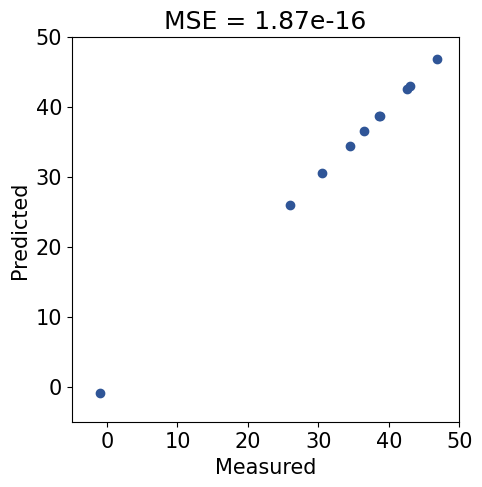

In [8]:
plt.rcParams["font.size"] = 15
plt.figure(figsize=(5,5))
plt.scatter(measured,predicted,color="#2F5597")
plt.xlim(-5,50)
plt.ylim(-5,50)
plt.title("MSE = {}".format(format(mse, ".2e")))
plt.xlabel("Measured")
plt.ylabel("Predicted")

plt.savefig("./result/Measured vs Predicted.pdf",bbox_inches='tight', dpi=300)

In [9]:
importance = {n:s for n, s in zip(features,gbdt.best_estimator_.feature_importances_)}
importance = pd.Series(importance)
importance

Glucose        0.746918
Metal ion      0.033203
Temperature    0.016579
Buffer         0.194132
Amino acid     0.009167
dtype: float64

In [10]:
importance.to_csv("./result/importance.csv")

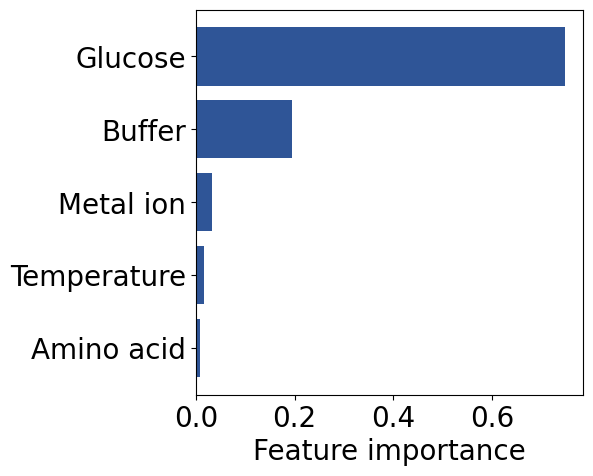

In [11]:
importance = importance.sort_values(ascending=False)

index = importance.index  
values = importance.values  

plt.rcParams["font.size"] = 20
fig, ax = plt.subplots(figsize=(5,5))
ax.barh(index,values,color="#2F5597")
ax.invert_yaxis()
ax.set_xlabel("Feature importance") 

plt.savefig("./result/importance.pdf",bbox_inches='tight', dpi=300)

In [ ]:
#以下はデータ分割後の精度評価

In [13]:
data = pd.read_excel("GBDT test data.xlsx",sheet_name = "data")
train, test = train_test_split(data)

In [14]:
param_grid_gbdt = {"learning_rate":[i/100 for i in range(1,51,1)],  
                   "max_depth":[2,3,4,5],
                   "n_estimators":[300]}

gbdt = GridSearchCV(GradientBoostingRegressor(),param_grid_gbdt,cv=3)

gbdt.fit(train[features] , train[label])

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06,
                                           0.07, 0.08, 0.09, 0.1, 0.11, 0.12,
                                           0.13, 0.14, 0.15, 0.16, 0.17, 0.18,
                                           0.19, 0.2, 0.21, 0.22, 0.23, 0.24,
                                           0.25, 0.26, 0.27, 0.28, 0.29, 0.3, ...],
                         'max_depth': [2, 3, 4, 5], 'n_estimators': [300]})

In [17]:
predicted = gbdt.predict(test[features])
predicted#予測値

array([25.77517675, 39.84599563, 25.05965574])

In [18]:
measured = np.array(test[label])
measured#実測値

array([26.02635, 30.52426, 36.52567])

In [19]:
mse = mean_squared_error(measured, predicted)
mse#平均二乗誤差

72.80910870004146

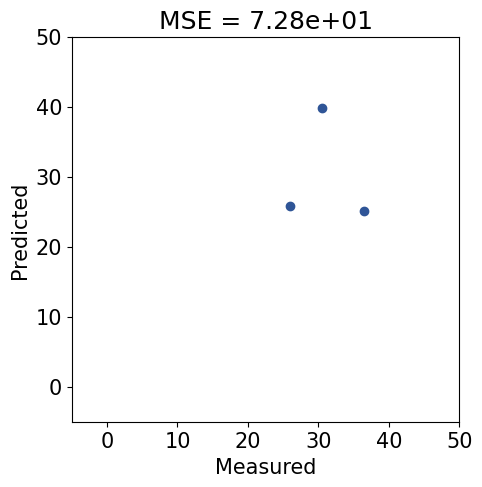

In [21]:
plt.rcParams["font.size"] = 15
plt.figure(figsize=(5,5))
plt.scatter(measured,predicted,color="#2F5597")
plt.xlim(-5,50)
plt.ylim(-5,50)
plt.title("MSE = {}".format(format(mse, ".2e")))
plt.xlabel("Measured")
plt.ylabel("Predicted")

plt.savefig("./result/Measured vs Predicted Splitting.pdf"
            ,bbox_inches='tight', dpi=300)